   @Author: v sanjay kumar<br>
   @Date: 2024-10-05 10:00:30<br>
   @Last Modified by: v sanjay kumar<br>
   @Last Modified time: 2024-10-05 11:00:30<br>
   @Title :Leanear regression problems<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from  sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

Multiple regression
1. Build a predictive linear regression model for given dataset, given temperature,
humidity, wind speed , wind bearing, visibility, pressure predict apparent
temperature


                                                Load the dataset

In [2]:
data=pd.read_csv(r"C:\Users\sanju\Downloads\szeged-weather\weatherHistory.csv")
data.isna().sum()


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [3]:
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


                                                   Check the null values

In [4]:
data.drop(['Formatted Date','Summary','Precip Type','Daily Summary'],axis=1,inplace=True)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           96453 non-null  float64
 1   Apparent Temperature (C)  96453 non-null  float64
 2   Humidity                  96453 non-null  float64
 3   Wind Speed (km/h)         96453 non-null  float64
 4   Wind Bearing (degrees)    96453 non-null  float64
 5   Visibility (km)           96453 non-null  float64
 6   Loud Cover                96453 non-null  float64
 7   Pressure (millibars)      96453 non-null  float64
dtypes: float64(8)
memory usage: 5.9 MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95


In [5]:
data.drop(['Loud Cover'],axis=1,inplace=True)

In [6]:

data.isna().sum()


Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

                                                Check the correlation of the futures

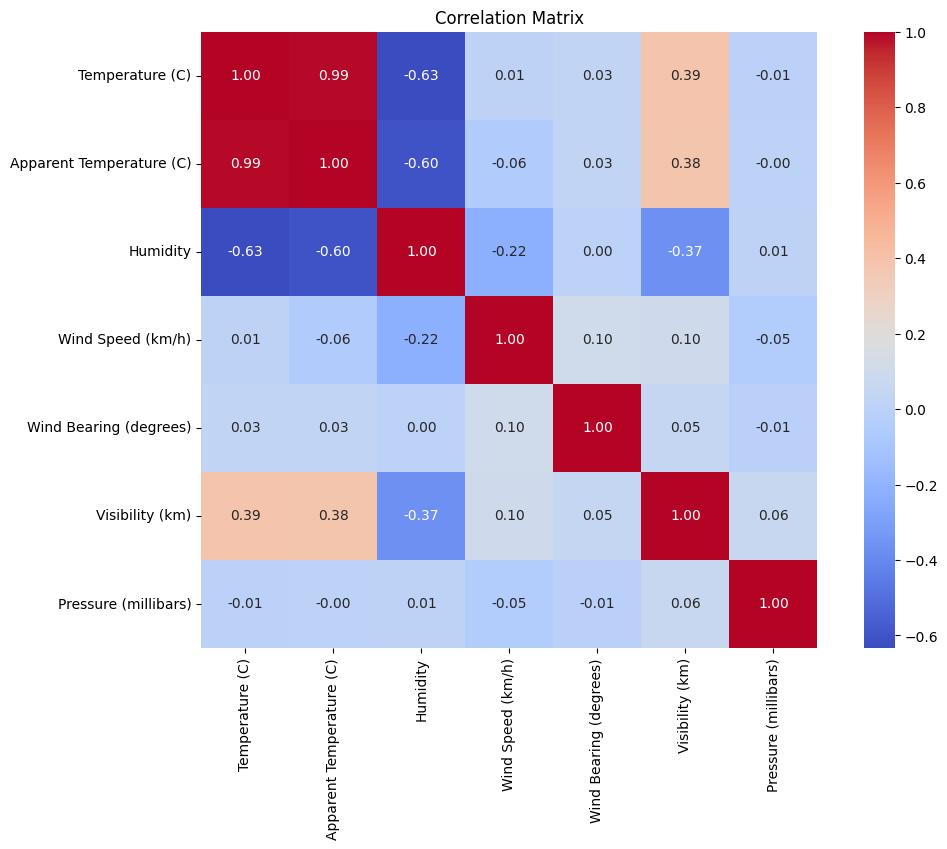

In [7]:
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Show the plot
plt.title("Correlation Matrix")
plt.show()

                                                  Check the Outlayers

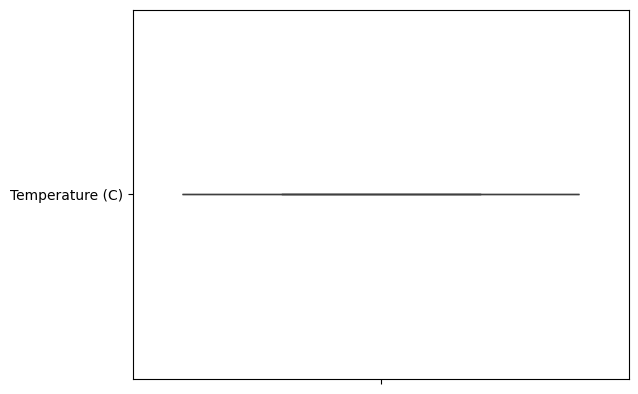

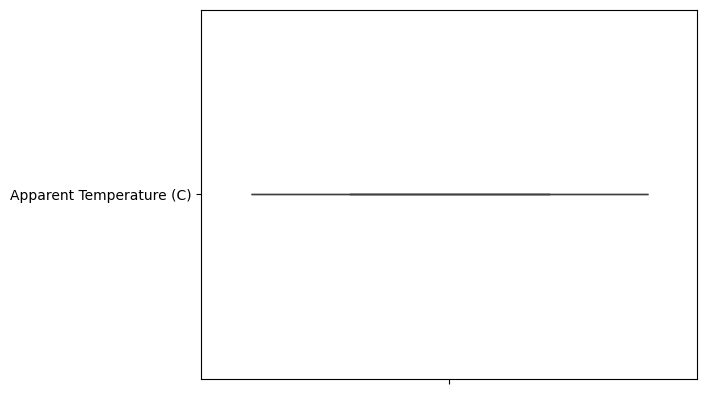

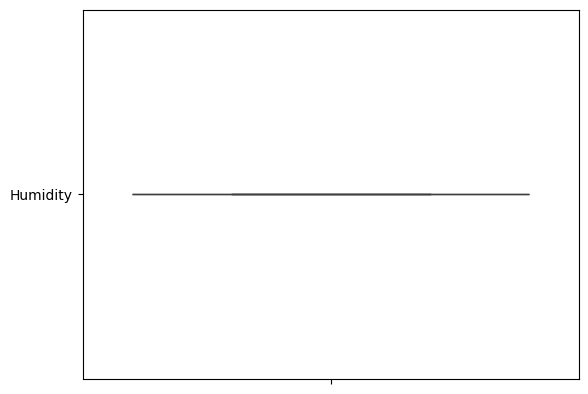

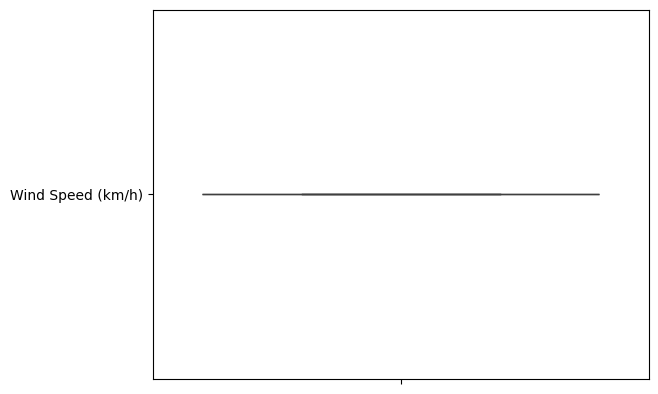

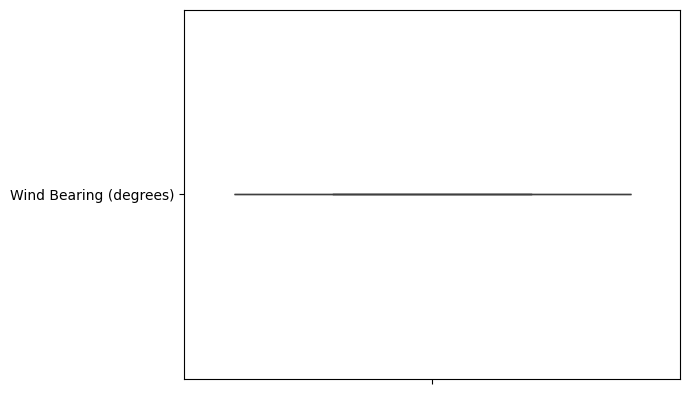

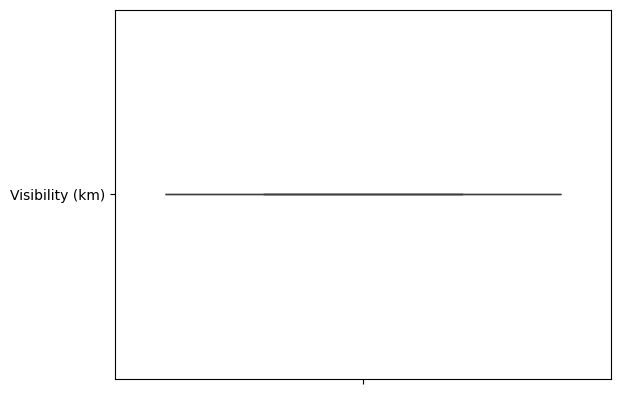

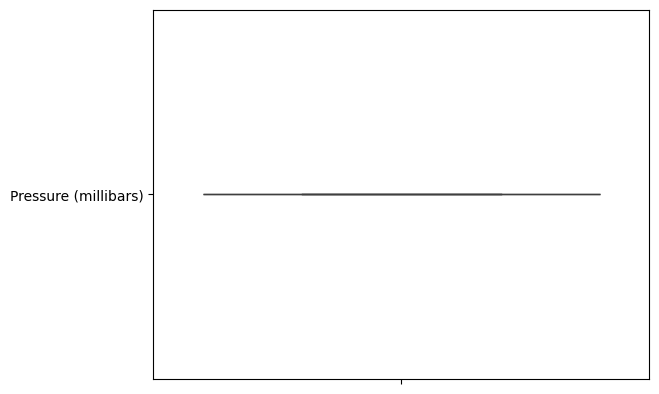

In [8]:
for column in data.columns:
    sns.boxplot(data=column)
    plt.show()

                                        Feature scaling

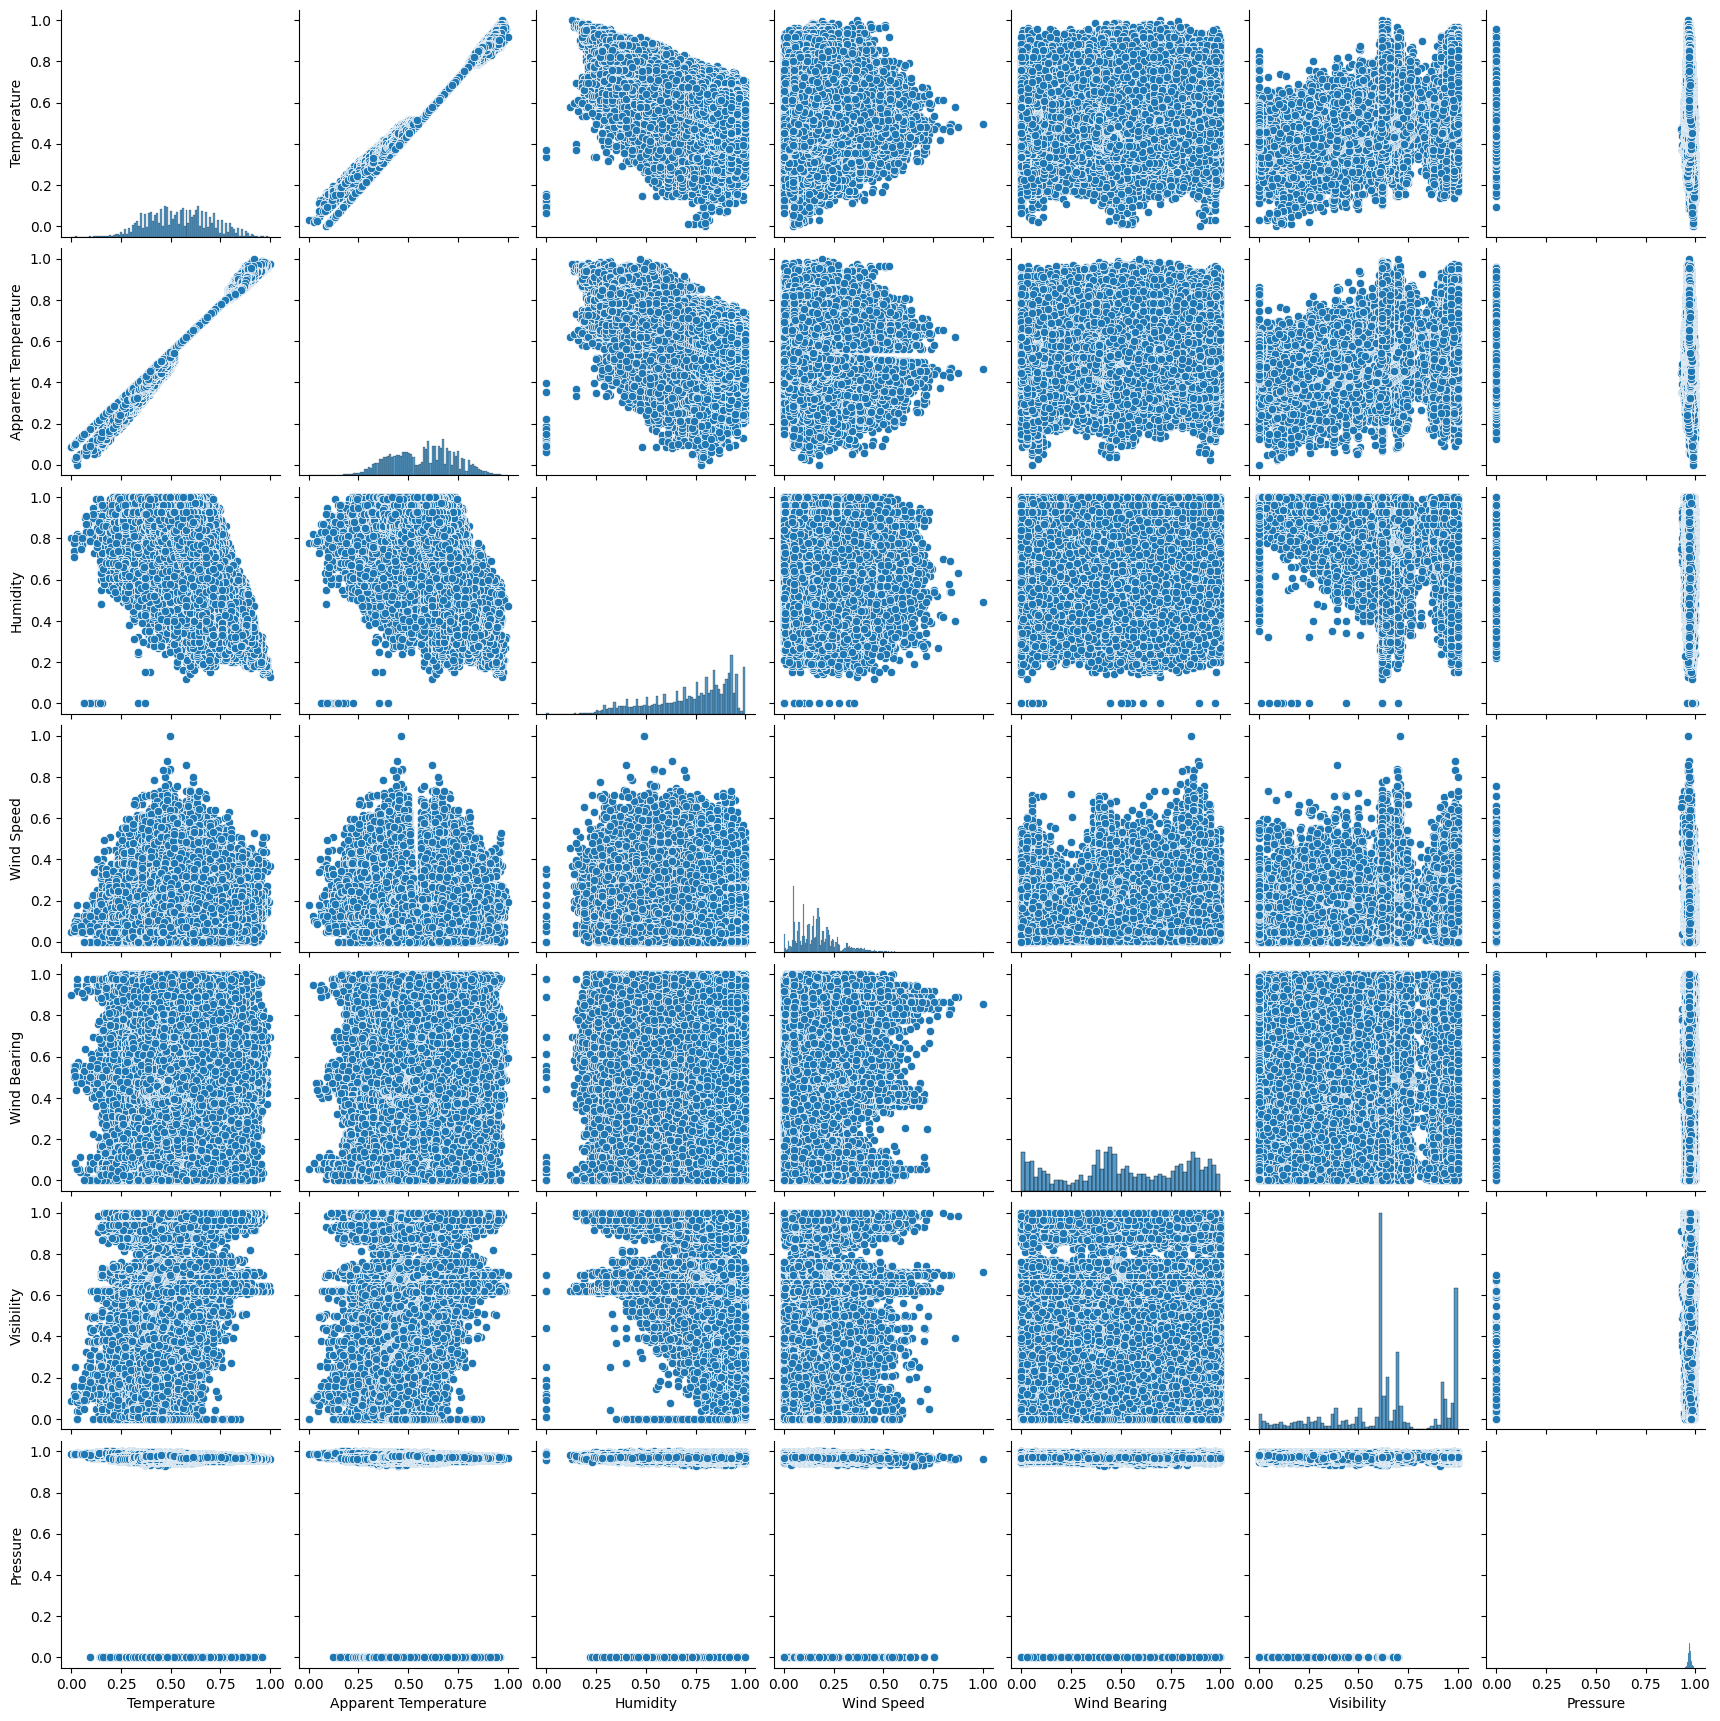

In [9]:
scalar =MinMaxScaler()
scalar_df=scalar.fit_transform(data)
Final_data =pd.DataFrame(scalar_df, columns=['Temperature','Apparent Temperature','Humidity','Wind Speed','Wind Bearing','Visibility','Pressure'])
sns.pairplot(Final_data)

                              Split the dataset into train data set and test data set

In [10]:
X = Final_data[['Temperature','Humidity','Wind Speed','Wind Bearing','Visibility','Pressure']]
y = Final_data['Apparent Temperature']
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2)
X_train


,Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure
25115,0.562776,0.64,0.026475,0.885794,0.620,0.980896
57397,0.821888,0.37,0.159355,0.111421,0.620,0.973470
37075,0.230672,0.96,0.046646,0.604457,0.373,0.983151
64725,0.342993,0.81,0.100857,0.863510,0.926,0.972142
72056,0.398074,0.76,0.226677,0.835655,0.000,0.000000
...,...,...,...,...,...,...
3997,0.826388,0.58,0.067322,0.551532,0.620,0.971980
18692,0.659077,0.68,0.030761,0.947075,0.643,0.973394
47415,0.393124,0.91,0.237771,0.415042,0.437,0.977188
78006,0.479525,0.83,0.049672,0.005571,0.603,0.980170


                                            train the Model

In [11]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

                                             predict the values

In [12]:
y_pred=model.predict(X_test1)
intercept = model.intercept_ 
print( model.coef_)
print(intercept)

[ 1.03569216e+00  1.52467272e-02 -9.12226477e-02  2.76395732e-03
 -3.26514076e-04  3.15803973e-03]
0.008824070306644671


In [13]:
model.score(X_test1,y_test1)

0.989869622565556

                                              Evaluate the model

In [14]:
y_pred1=model.predict(X_test1)
mean_error =mean_squared_error(y_test1,y_pred1)
r2 =r2_score(y_test1,y_pred1)

print(f"Mean Squared Error: {mean_error}")
print(f"R² score: {r2}")
y_pred
# y_test

Mean Squared Error: 0.000256385601646327
R² score: 0.989869622565556


array([0.51307452, 0.42781018, 0.58755816, ..., 0.83686822, 0.58032721,
       0.53009144])

In [15]:
y_test1

84489    0.563168
43878    0.422583
79430    0.599619
51170    0.431861
20729    0.353658
           ...   
53344    0.861238
96016    0.769779
78898    0.821224
52295    0.590258
84709    0.544777
Name: Apparent Temperature, Length: 19291, dtype: float64

                                                 Evaluate the model

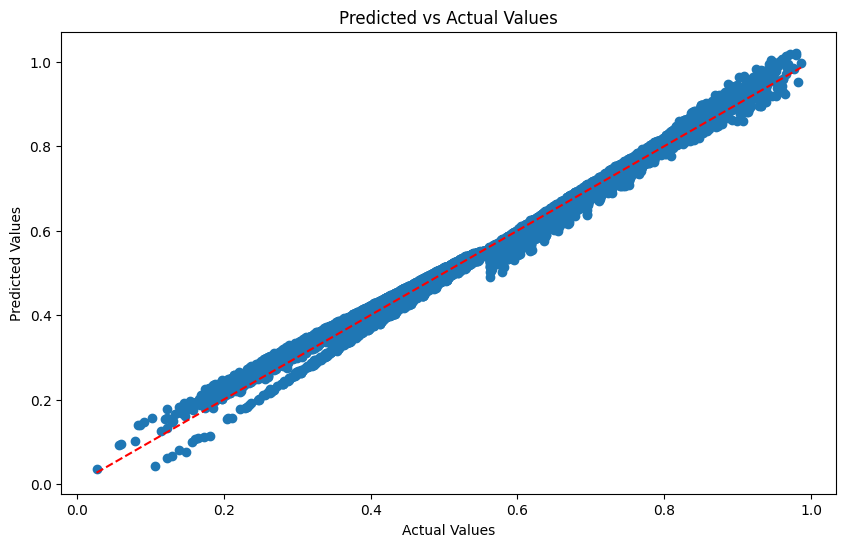

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred1)
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], color='r', linestyle='--')  # Identity line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()